In [2]:
#Load required libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets

In [3]:
#Load Dataset
boston = datasets.load_boston()
house = pd.DataFrame(boston.data,columns=boston.feature_names)
house['MEDV'] = boston.target
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#Feature selection
feature_cols = ['LSTAT']
X = house[feature_cols]  #Selected features
y = house.MEDV        #Class/output variable

In [10]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=1)
X_test

,LSTAT
307,7.53
343,7.18
47,18.80
67,8.10
362,10.19
132,11.12
292,4.70
31,13.04
218,17.92
90,8.81


In [11]:
#Building decision tree model
clf = DecisionTreeRegressor(criterion="mse", max_depth=5)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
#Evaluate your model
from sklearn.metrics import mean_squared_error
print("Mean squared error = ", mean_squared_error(y_test, y_pred))

Mean squared error =  28.37100986456834


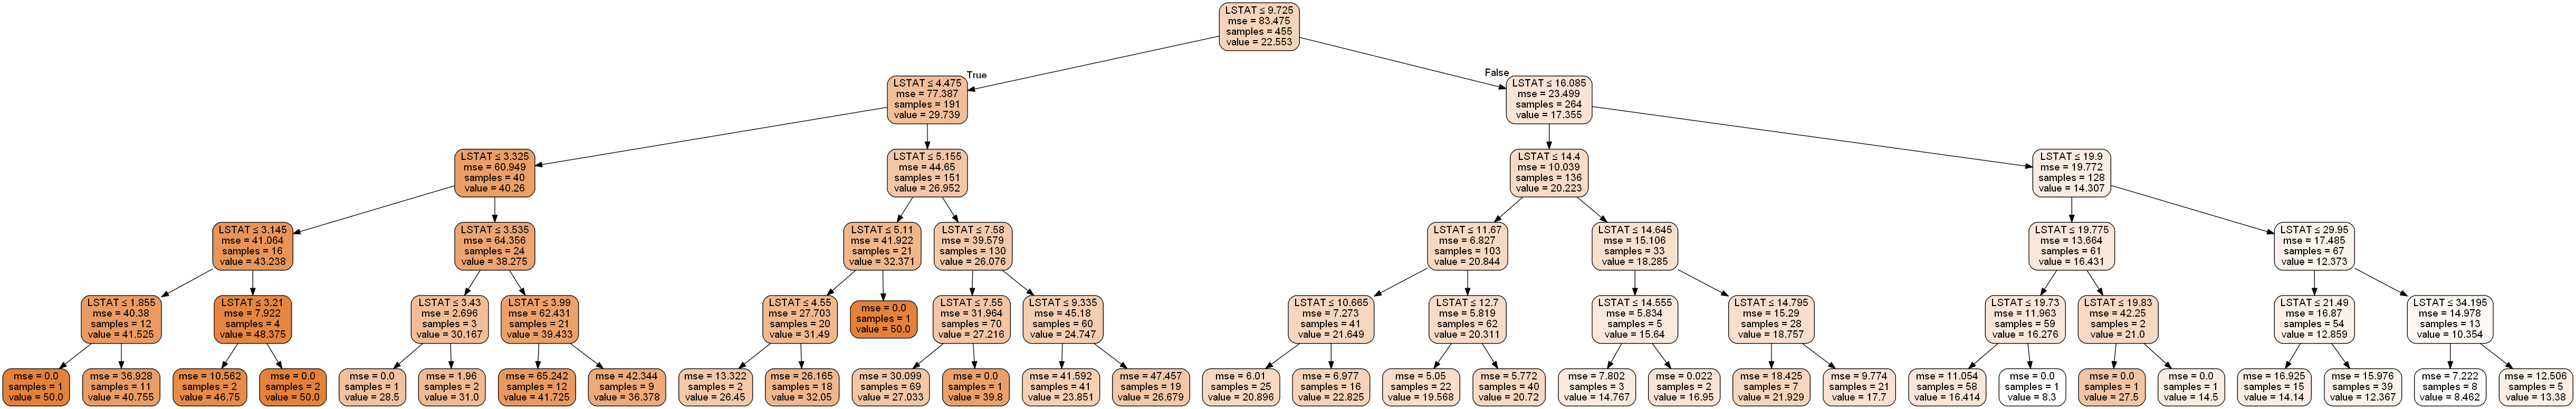

In [14]:
# To visualize the generated decision tree in tree form, you can use
# graphviz function

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                 filled = True, rounded = True,
               special_characters=True, feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('boston-housing-price-regressor.png')
Image(graph.create_png())